In [1]:
import torch

import scipy.ndimage
import pandas as pd
import numpy as np

from tabpfn.utils import get_latest_losses, make_long_loss_df


/anaconda/envs/tabpfn/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
 losses_dict,  lr_dict, wallclock_dict, last_saves = get_latest_losses()

Error on models_diff/perceiver_output_128_emsize_512_nlayers_12_steps_1024_07_01_2023_17_56_04_epoch_on_exit.cpkt: PytorchStreamReader failed reading zip archive: failed finding central directory


In [3]:
long_df = make_long_loss_df(losses_dict, lr_dict, wallclock_dict)

mothernet_512_lr_0003_steps_256_07_01_2023_00_19_31
0.8097696323950668
mothernet_512_everywhere_steps_1024_batch_16_07_02_2023_17_29_55
0.8851519389292202
mothernet_512_lr_0001_steps_256_batch_64_07_03_2023_15_04_04
0.8176342890367594
mothernet_512_lr_00003_steps_4096_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_13_54
0.9672462808525542
mothernet_512_lr_00003_steps_4096_batch_16_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_13_29
0.9736454147746988
mothernet_512_lr_00003_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_13
0.9812599664710386
mothernet_512_lr_0001_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_32
0.978063730490171
mothernet_512_everywhere_steps_1024_batch_16_one_gpu_07_05_2023_17_19_46
0.9319707663015072
tabpfn_512_lr_0001_steps_256_batch_64_aggregate_k_2_07_05_2023_20_21_50
0.6599131012136588
tabpfn_512_lr_0001_steps_4096_batch_4_aggregate_k_1_07_09_2023_17_06_36
0.9583566155478555
mothernet_512_steps_1024_batch

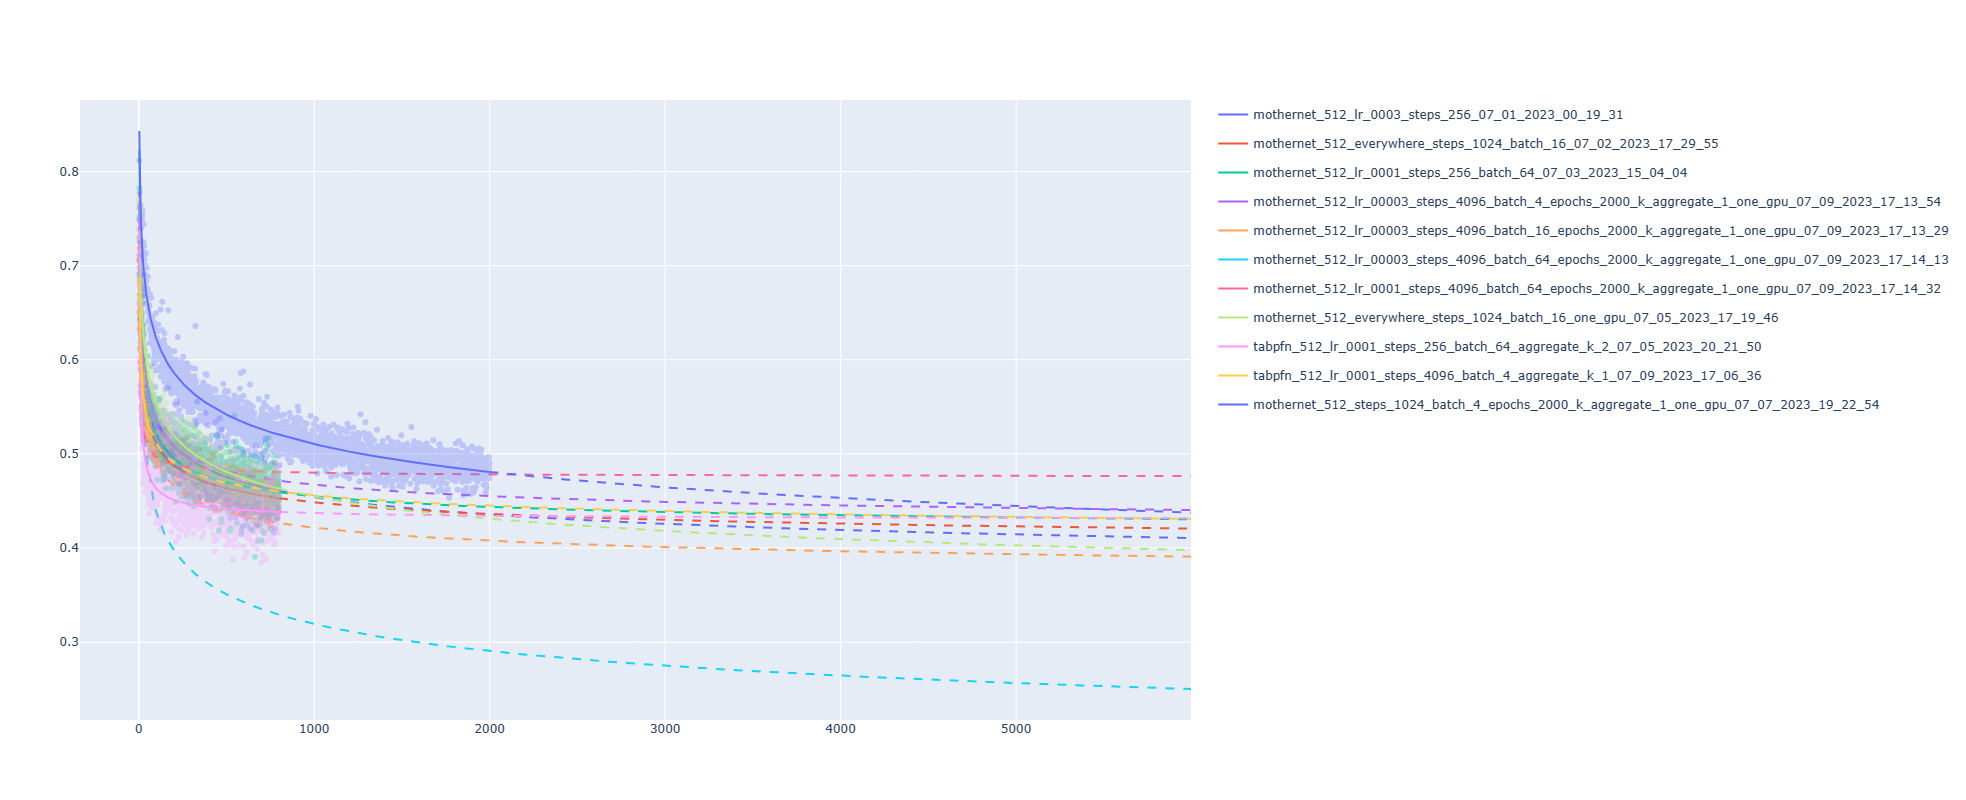

In [4]:
from tabpfn.fit_learning_curve import plot_exponential_regression


show_only = [
            # 'predict_mlp_embedding_4096_hidden_128_decoder_nhid_2048_nlayer_12',
     # 'predict_mlp_embedding_4096_hidden_128_decoder_nhid_2048_nlayer_12_lr003',
           #'reproduce_reference_config_try_again_800_epochs_06_07_2023_21_49_10',
             #'perceiver_output_128_emsize_512_nlayers_12_06_28_2023_22_09_12',
            # 'mothernet_warm_start_512_everywhere_06_29_2023_19_58_59',
             'mothernet_512_lr_0003_steps_256_07_01_2023_00_19_31',
            'perceiver_output_128_emsize_512_nlayers_12_steps_1024_07_01_2023_17_56_04',
             'mothernet_512_everywhere_steps_1024_batch_16_07_02_2023_17_29_55',
             'mothernet_512_lr_0001_steps_256_batch_64_07_03_2023_15_04_04',
            'mothernet_512_everywhere_steps_1024_batch_16_one_gpu_07_05_2023_17_19_46',
            'tabpfn_512_lr_0001_steps_256_batch_64_aggregate_k_2_07_05_2023_20_21_50',
       'mothernet_512_steps_1024_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_07_2023_19_22_54',
     #   'mothernet_512_steps_512_batch_16_epochs_2000_k_aggregate_1_one_gpu_07_07_2023_19_22_39',
    #'mothernet_768_steps_1024_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_07_2023_19_24_20',
    # 'mothernet_1024_steps_1024_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_07_2023_19_23_40',
    #'mothernet_768_steps_1024_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_08_2023_16_21_01',
    #'mothernet_512_steps_1024_batch_16_epochs_2000_k_aggregate_1_one_gpu_continue_07_08_2023_16_23_52',
    #'mothernet_1024_steps_1024_batch_16_epochs_2000_k_aggregate_1_one_gpu_continue_07_08_2023_21_58_12',
    'mothernet_512_lr_00003_steps_4096_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_13_54',
    'mothernet_512_lr_00003_steps_4096_batch_16_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_13_29',
    'mothernet_512_lr_00003_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_13',
    'mothernet_512_lr_0001_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_32',
    'tabpfn_512_lr_0001_steps_4096_batch_4_aggregate_k_1_07_09_2023_17_06_36'  # actually mothernet
            ]

#long_df = make_long_loss_df(losses_dict)
long_df = long_df[long_df.run.isin(show_only)]
long_df = long_df[long_df.epoch > 2]
fig = plot_exponential_regression(long_df, x="epoch", y='loss', hue="run", extrapolation_factor=3)
fig

In [5]:
from scipy.signal import convolve, windows
import plotly.express as px
import numpy as np
#window = windows.gaussian(50, 10)
#window = windows.gaussian(100, 20)
window = windows.gaussian(20, 4)
window /= window.sum()
long_df = make_long_loss_df(losses_dict, lr_dict, wallclock_dict, smoother=window)
#long_df = make_long_loss_df(losses_dict, smooth=lambda x : savgol_filter(x[30:], 51, 3, mode='nearest') if x and len(x) > 82 else [])
long_df = long_df[long_df.run.isin(show_only)]
fig = px.line(long_df, x="epoch", y='loss', color="run")
fig.update_layout(height=800)
fig.show()

NameError: name 'convolve' is not defined

mothernet_512_lr_0003_steps_256_07_01_2023_00_19_31
0.8100751102583639
mothernet_512_everywhere_steps_1024_batch_16_07_02_2023_17_29_55
0.8841387592442327
mothernet_512_lr_0001_steps_256_batch_64_07_03_2023_15_04_04
0.8196706726835182
mothernet_512_lr_00003_steps_4096_batch_4_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_13_54
0.9690360138978306
mothernet_512_lr_00003_steps_4096_batch_16_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_13_29
0.9763763771306534
mothernet_512_lr_00003_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_13
0.9875296234357236
mothernet_512_lr_0001_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_32
0.9792382178422756
mothernet_512_everywhere_steps_1024_batch_16_one_gpu_07_05_2023_17_19_46
0.9295746720211481
tabpfn_512_lr_0001_steps_256_batch_64_aggregate_k_2_07_05_2023_20_21_50
0.65913095328138
tabpfn_512_lr_0001_steps_4096_batch_4_aggregate_k_1_07_09_2023_17_06_36
0.9575356429001686
mothernet_512_steps_1024_batch_

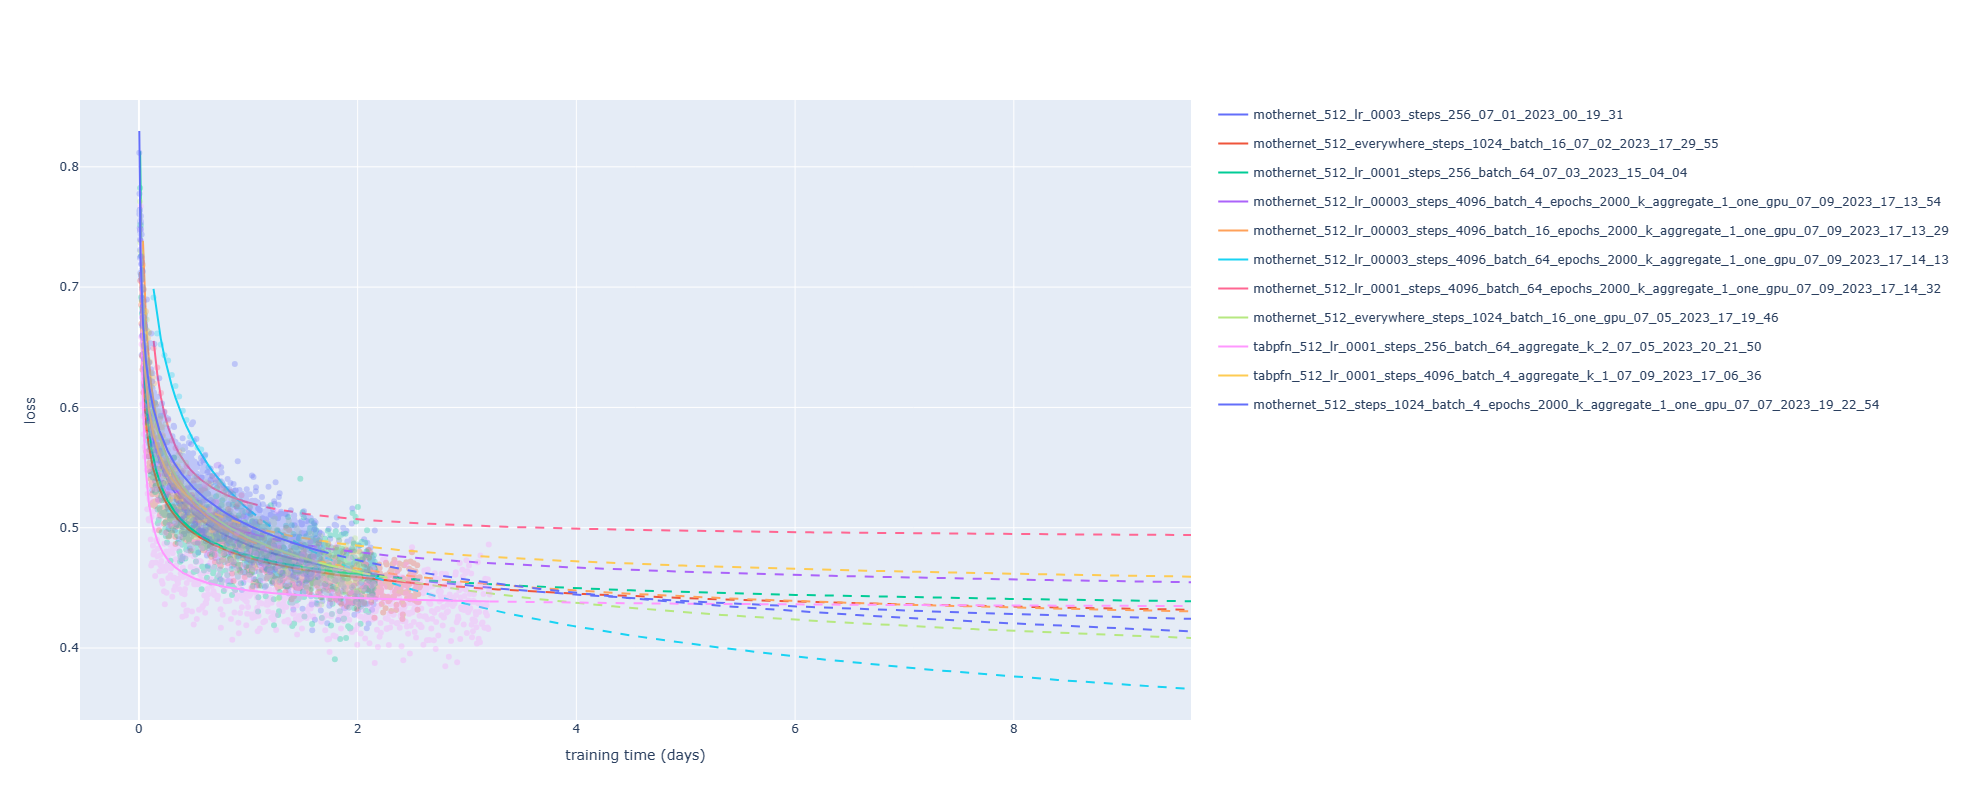

In [5]:
long_df = make_long_loss_df(losses_dict)
#long_df = make_long_loss_df(losses_dict, smooth=lambda x : savgol_filter(x[30:], 51, 3, mode='nearest') if x and len(x) > 82 else [])
long_df = long_df[long_df.run.isin(show_only)]
long_df = long_df[~long_df.time.isna()]
long_df = long_df[long_df.epoch > 2]
long_df['time_hours'] = long_df.time / 3600
long_df['time_days'] = long_df.time_hours / 24
# long_df.loc[long_df.run == 'mothernet_512_everywhere_steps_1024_batch_16_one_gpu_07_05_2023_17_19_46', 'time_days'] /= 4

fig = plot_exponential_regression(long_df, x='time_days', extrapolation_factor=3)
fig.update_layout(xaxis_title="training time (days)", yaxis_title="loss")
fig

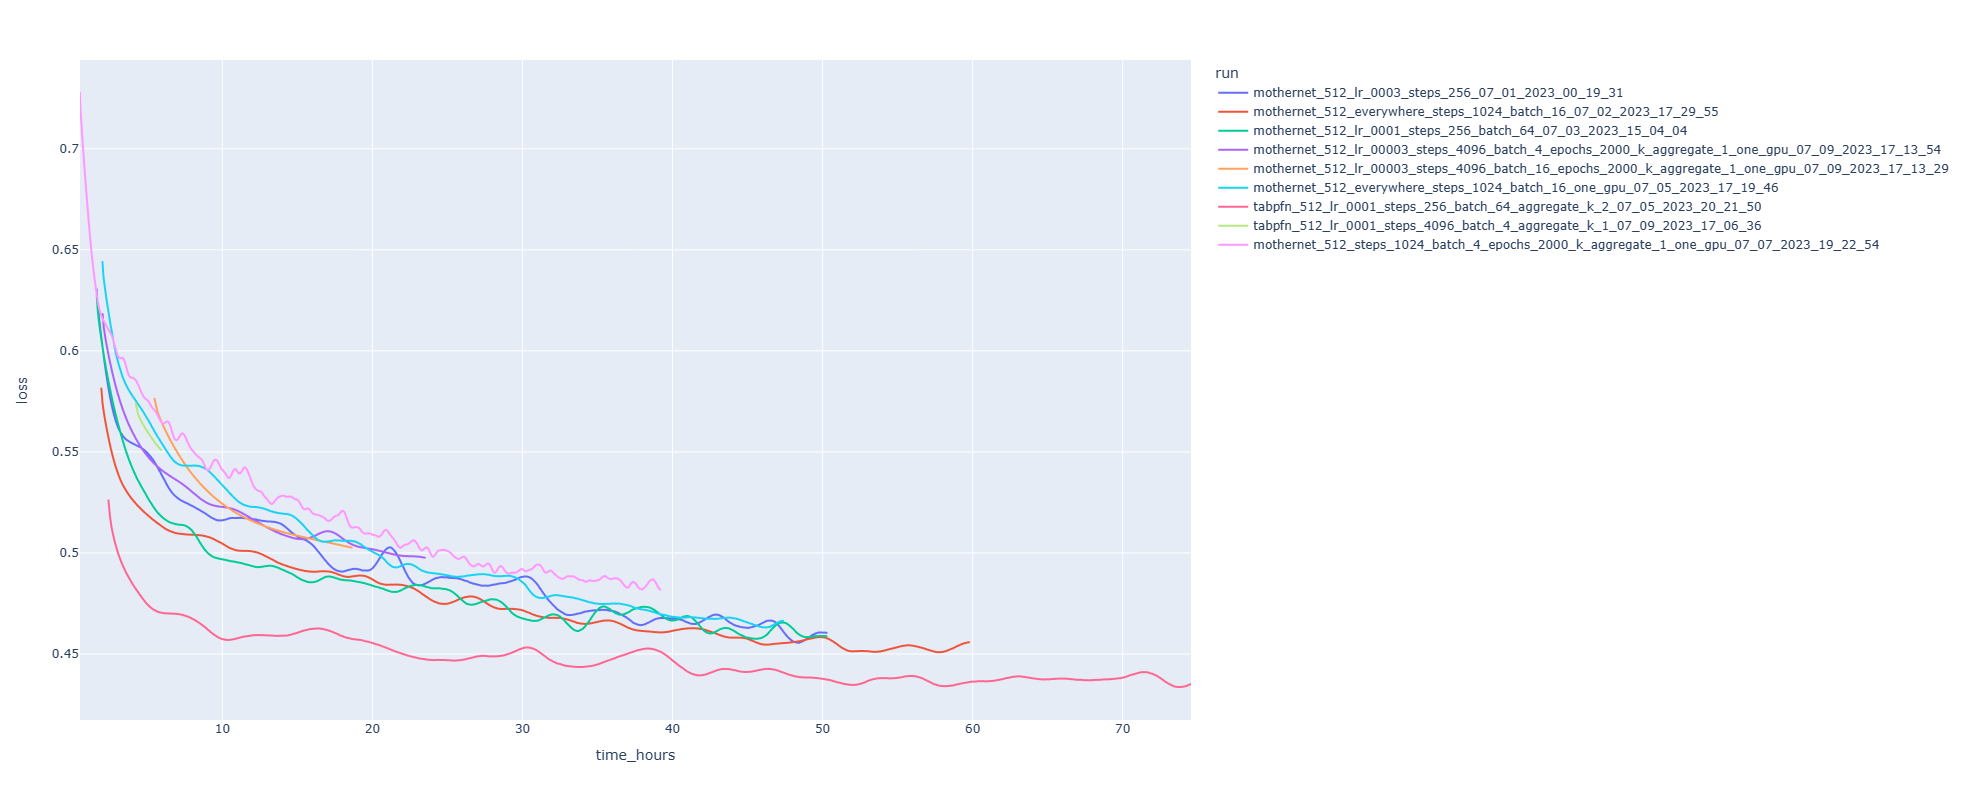

In [6]:
from scipy.signal import convolve, windows
import numpy as np
window = windows.gaussian(50, 10)
#window = windows.gaussian(100, 20)
#window = windows.gaussian(20, 4)
window /= window.sum()
long_df = make_long_loss_df(losses_dict, lr_dict, wallclock_dict, smoother=window)
long_df = long_df[~long_df.time.isna()]
#long_df = make_long_loss_df(losses_dict, smooth=lambda x : savgol_filter(x[30:], 51, 3, mode='nearest') if x and len(x) > 82 else [])
long_df = long_df[long_df.run.isin(show_only)]
long_df['time_hours'] = long_df.time / 3600
fig = px.line(long_df, x="time_hours", y='loss', color="run")
fig.update_layout(height=800)
fig.show()

In [13]:
from tabpfn.utils import compare_dicts
from tabpfn.scripts.model_builder import load_model


#m, c1 = load_model('models_diff/mothernet_512_lr_00003_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_2023_17_14_13_epoch_50.cpkt', device='cpu')
#m, c2 = load_model('models_diff/mothernet_512_lr_0001_steps_4096_batch_64_epochs_2000_k_aggregate_1_one_gpu_07_09_epoch_on_exit.cpkt', device='cpu')
#compare_dicts(c1, c2)

In [16]:
m, c = load_model(last_saves['perceiver_output_128_emsize_512_nlayers_12_steps_1024_07_01_2023_17_56_04'][0], device="cpu")
c

Using a Transformer with 92.47 M parameters
Using cpu device
Single GPU training on NVIDIA A100 80GB PCIe
learning rate:0.0001
steps_per_epoch:1024


{'lr': 0.0001,
 'dropout': 0.0,
 'emsize': 512,
 'batch_size': 32,
 'nlayers': 12,
 'num_features': 100,
 'nhead': 4,
 'nhid_factor': 2,
 'bptt': 8320,
 'eval_positions': [7904],
 'seq_len_used': 50,
 'sampling': 'normal',
 'epochs': 800,
 'num_steps': 1024,
 'verbose': False,
 'mix_activations': False,
 'pre_sample_causes': True,
 'multiclass_type': 'rank',
 'nan_prob_unknown_reason_reason_prior': 0.5,
 'categorical_feature_p': 0.2,
 'nan_prob_no_reason': 0.0,
 'nan_prob_unknown_reason': 0.0,
 'nan_prob_a_reason': 0.0,
 'max_num_classes': 10,
 'num_classes': <function priors.utils.<lambda>.<locals>.<lambda>()>,
 'noise_type': 'Gaussian',
 'balanced': False,
 'normalize_to_ranking': False,
 'set_value_to_nan': 0.1,
 'normalize_by_used_features': True,
 'num_features_used': {'uniform_int_sampler_f(3,max_features)': <function tabpfn.priors.utils.<lambda>.<locals>.<lambda>()>},
 'num_categorical_features_sampler_a': -1.0,
 'differentiable_hyperparameters': {'prior_bag_exp_weights_1': {'di